In [16]:
# Importing libraries
import pandas as pd
import string
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.lsa import LsaSummarizer

In [18]:
# Input text - to summarize  
book=pd.read_table("C:/Users/Lenovo/Downloads/Text_data",error_bad_lines=False,names=['x'])

In [19]:
book.head()

,x
0,Abstract
1,"Einstein's article titled, “The Fundaments of ..."
2,"Washington, D.C., May 24, 1940, is presented i..."
3,of the history and status of the foundations o...
4,it provides the background for discussing the ...


In [20]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

['Abstract',
 "Einstein's article titled, “The Fundaments of Theoretical Physics”, from Science,",
 'Washington, D.C., May 24, 1940, is presented in its entirety as it is an outstanding presentation',
 'of the history and status of the foundations of theoretical physics as it stood in 1940. Further,',
 'it provides the background for discussing the new view of the fundaments of theoretical physics',
 'provided by the energy and entropy foundation of the Dynamic Theory.',
 'Keywords: Energy, Entropy, Equations of motion, Quantum Mechanics, Gauge fields',
 'Introduction',
 'Einstein spent virtually his entire working life in theoretical physics. He had an extremely clear',
 'view of what the foundations of theoretical physics was and should be. He was able to express this']

In [21]:
# Joining the list into one string/text
text = ' '.join(book)
text

'Abstract Einstein\'s article titled, “The Fundaments of Theoretical Physics”, from Science, Washington, D.C., May 24, 1940, is presented in its entirety as it is an outstanding presentation of the history and status of the foundations of theoretical physics as it stood in 1940. Further, it provides the background for discussing the new view of the fundaments of theoretical physics provided by the energy and entropy foundation of the Dynamic Theory. Keywords: Energy, Entropy, Equations of motion, Quantum Mechanics, Gauge fields Introduction Einstein spent virtually his entire working life in theoretical physics. He had an extremely clear view of what the foundations of theoretical physics was and should be. He was able to express this view so vividly that it is hard to imagine being able to improve upon his words. Here is the article, published in 1940, in which Einstein sets forth the fundaments of theoretical physics as he understood it then. Little has changed in the fundaments unti

In [22]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
en = spacy.load('en_core_web_sm')
stopword = en.Defaults.stop_words

In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from nltk.stem import WordNetLemmatizer
import re

wordnet = WordNetLemmatizer()

In [26]:
# Cleaning the corpus
def cleanup_text(docs):
    texts = []
    doc = en(docs)
    sentences = sent_tokenize(' '.join(map(str, doc)))
    
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    for i in range(len(sentences)):
        eBook = re.sub("[^A-Za-z" "]+"," ", sentences[i])
        eBook = re.sub("[0-9" "]+"," ", sentences[i])
        eBook = re.sub(r'[^\w]', ' ', sentences[i])
        eBook = re.sub(r'[^\S]', ' ', sentences[i])
        eBook = re.sub(r'\[.+\]', ' ', sentences[i])
        eBook = re.sub(r'[‘’“”_—]', '', sentences[i])
        eBook = eBook.lower()
        eBook = eBook.split()
        eBook = [wordnet.lemmatize(word) for word in eBook if not word in stopword]
        eBook = [wordnet.lemmatize(word) for word in eBook if not word in punctuation]
        eBook = ' '.join(eBook)
        texts.append(eBook)
    while("" in texts) :
        texts.remove("")    
    return texts

In [27]:
# cleaning corpus 
cleaned_1 = cleanup_text(str(text))

In [28]:
# Joining the list into one string/text
text2=','.join(cleaned_1)
text2

'abstract einstein article titled fundament theoretical physic science washington d.c. 24 1940 presented entirety outstanding presentation history status foundation theoretical physic stood 1940,provides background discussing new view fundament theoretical physic provided energy entropy foundation dynamic theory,keywords energy entropy equation motion quantum mechanic gauge field introduction einstein spent virtually entire working life theoretical physic,extremely clear view foundation theoretical physic,able express view vividly hard imagine able improve word,article published 1940 einstein set forth fundament theoretical physic understood,little changed fundament recently,following einstein article brief discussion recent development foundation theoretical physic display fundamental role energy entropy fundament theoretical physic,einstein article fundament theoretical physic science washington d. c. 24 1940 science attempt chaotic diversity sense experience correspond logically uni

In [80]:
len(text2)

84645

##  WordCloud

In [13]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

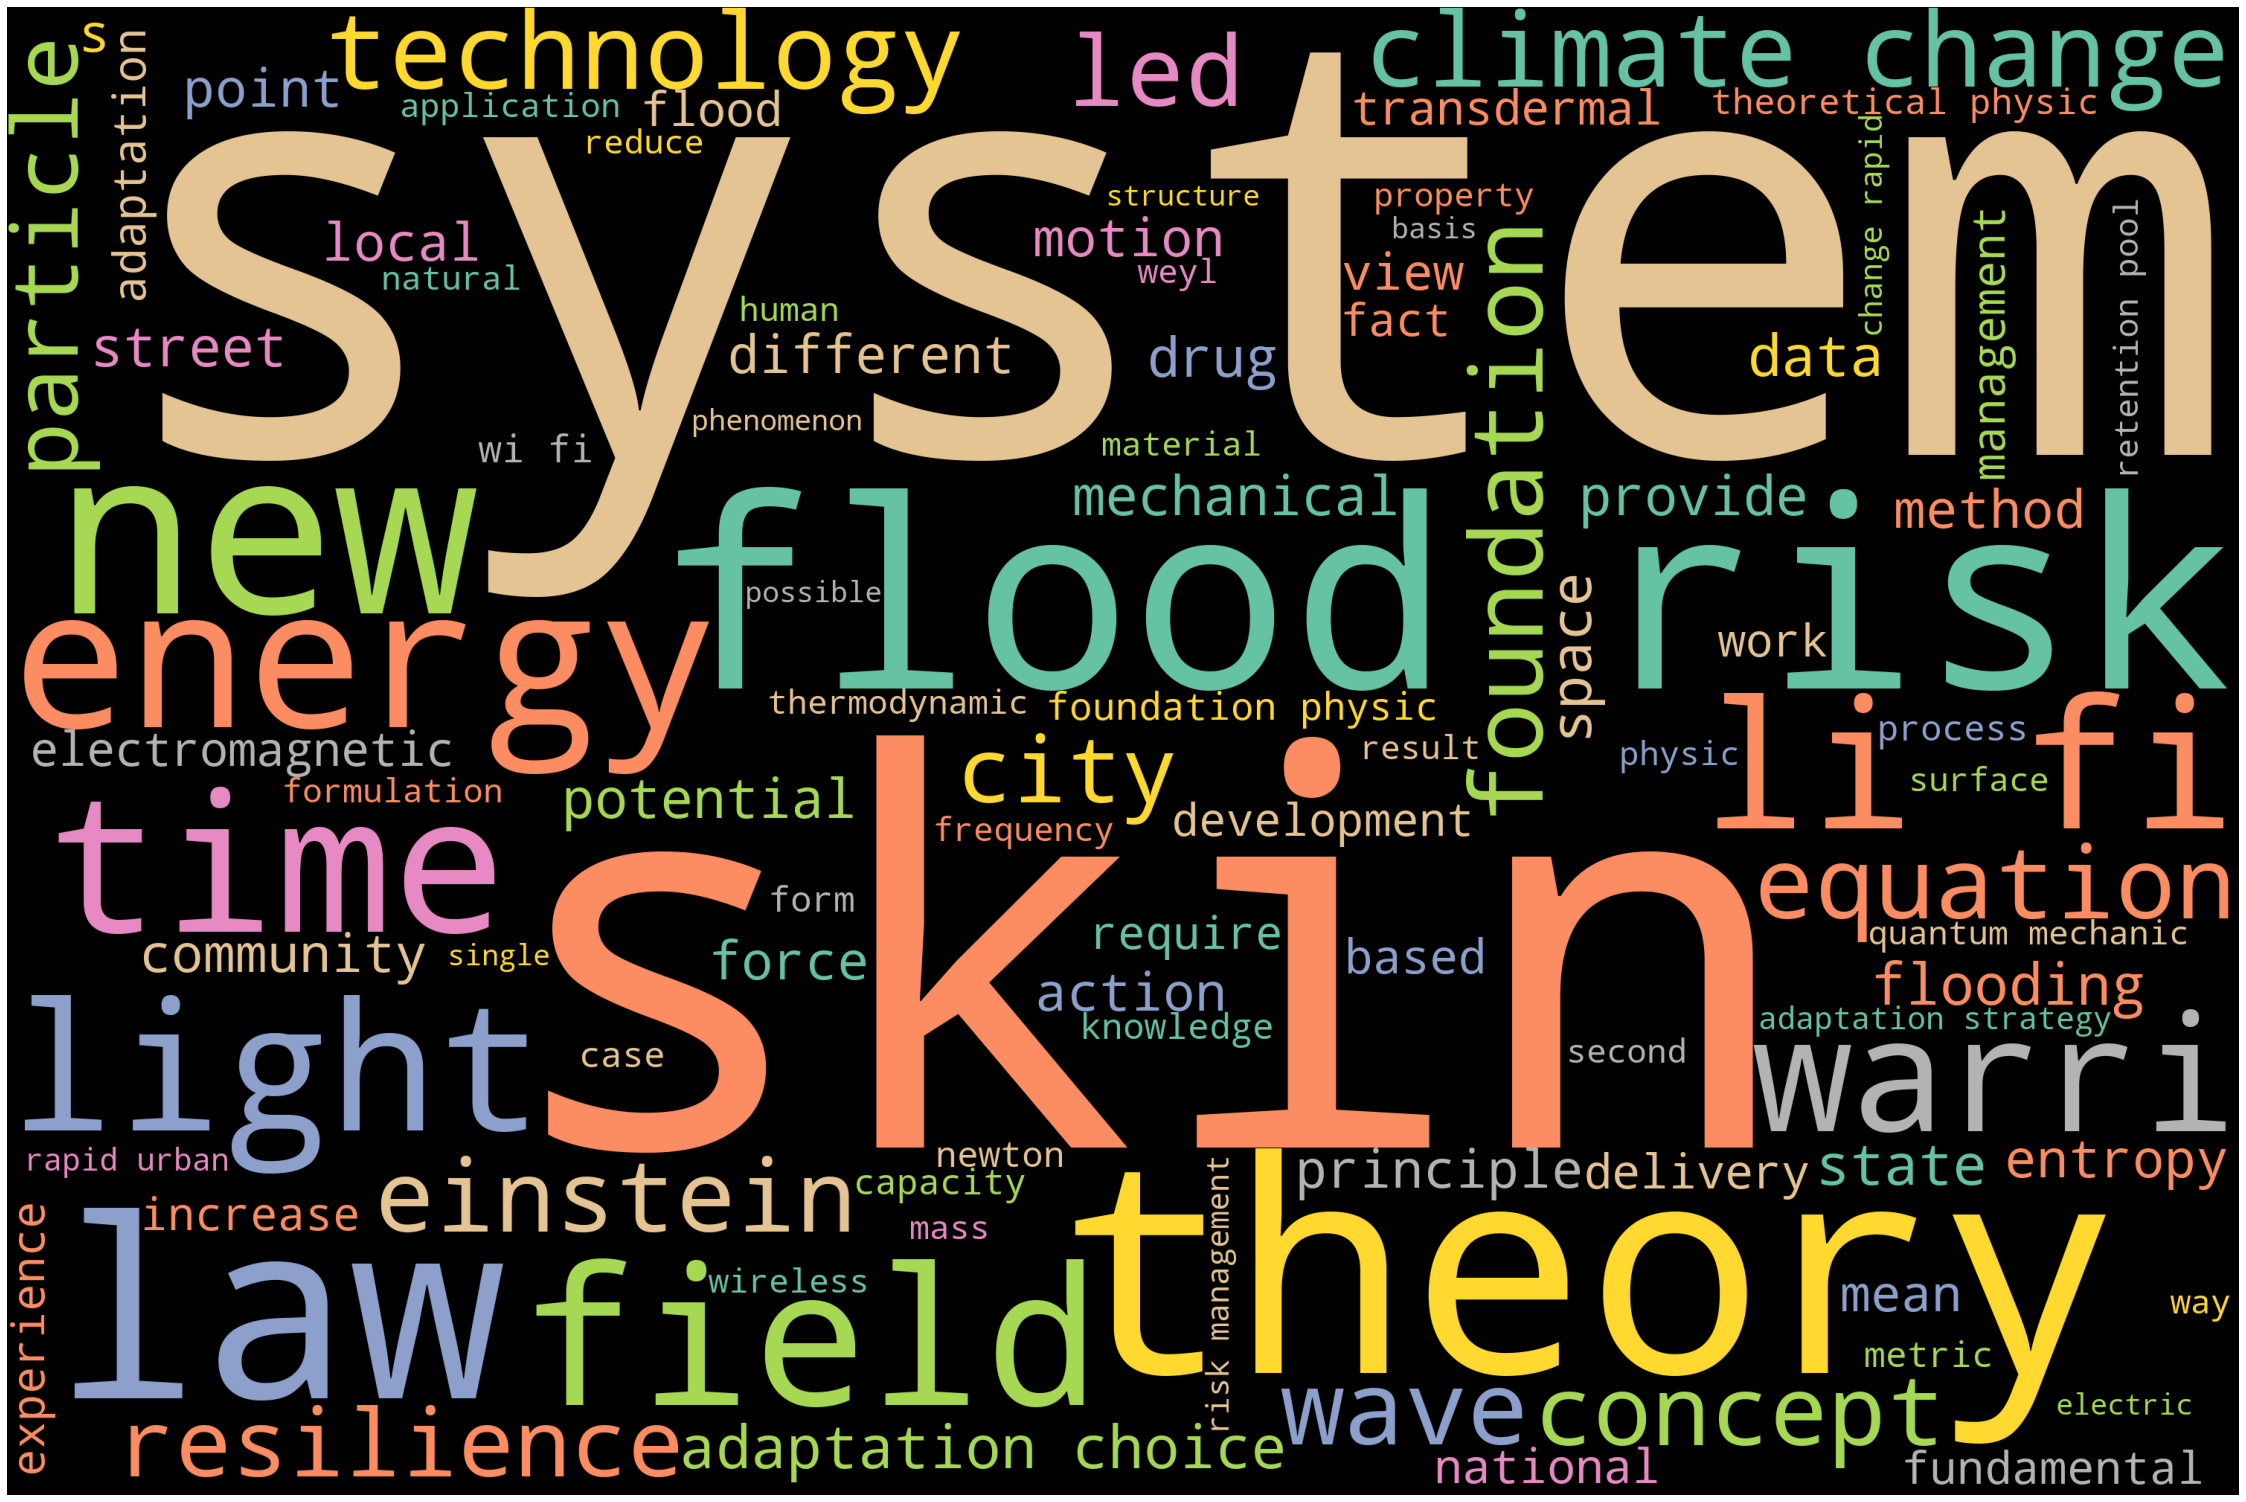

In [14]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text2)
# Plot
plot_cloud(wordcloud)

Inference: The words SYSTEM and SKIN most frequent occuring words in my corpus.

# Frequency method

In [29]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')


In [30]:
# Tokenizing the text 
stopWords = list(stopwords.words("english"))+list(punctuation)+list([0,1,2,3,4,5,6,7,8,9])
stopWords[15:20]

['yourself', 'yourselves', 'he', 'him', 'his']

In [31]:
# Tokenizing the text
words = word_tokenize(text2) 
words[15:25]

['presentation',
 'history',
 'status',
 'foundation',
 'theoretical',
 'physic',
 'stood',
 '1940',
 ',',
 'provides']

In [32]:
freqTable={}
   
for word in words: 
    word = word.lower() 
    if word not in stopWords:
        if word in freqTable: 
            freqTable[word] += 1
        else: 
            freqTable[word] = 1

In [33]:
print(freqTable)

{'abstract': 3, 'einstein': 28, 'article': 4, 'titled': 1, 'fundament': 12, 'theoretical': 29, 'physic': 46, 'science': 9, 'washington': 2, 'd.c.': 1, '24': 3, '1940': 5, 'presented': 5, 'entirety': 1, 'outstanding': 1, 'presentation': 1, 'history': 2, 'status': 1, 'foundation': 45, 'stood': 1, 'provides': 9, 'background': 2, 'discussing': 1, 'new': 46, 'view': 15, 'provided': 3, 'energy': 51, 'entropy': 19, 'dynamic': 4, 'theory': 64, 'keywords': 1, 'equation': 30, 'motion': 22, 'quantum': 31, 'mechanic': 26, 'gauge': 9, 'field': 59, 'introduction': 5, 'spent': 1, 'virtually': 2, 'entire': 3, 'working': 6, 'life': 14, 'extremely': 4, 'clear': 5, 'able': 7, 'express': 1, 'vividly': 1, 'hard': 2, 'imagine': 6, 'improve': 7, 'word': 4, 'published': 2, 'set': 7, 'forth': 1, 'understood': 3, 'little': 3, 'changed': 4, 'recently': 2, 'following': 6, 'brief': 2, 'discussion': 4, 'recent': 7, 'development': 17, 'display': 4, 'fundamental': 26, 'role': 6, 'd.': 1, 'c.': 1, 'attempt': 8, 'chaot

In [34]:
print(freqTable.items())

dict_items([('abstract', 3), ('einstein', 28), ('article', 4), ('titled', 1), ('fundament', 12), ('theoretical', 29), ('physic', 46), ('science', 9), ('washington', 2), ('d.c.', 1), ('24', 3), ('1940', 5), ('presented', 5), ('entirety', 1), ('outstanding', 1), ('presentation', 1), ('history', 2), ('status', 1), ('foundation', 45), ('stood', 1), ('provides', 9), ('background', 2), ('discussing', 1), ('new', 46), ('view', 15), ('provided', 3), ('energy', 51), ('entropy', 19), ('dynamic', 4), ('theory', 64), ('keywords', 1), ('equation', 30), ('motion', 22), ('quantum', 31), ('mechanic', 26), ('gauge', 9), ('field', 59), ('introduction', 5), ('spent', 1), ('virtually', 2), ('entire', 3), ('working', 6), ('life', 14), ('extremely', 4), ('clear', 5), ('able', 7), ('express', 1), ('vividly', 1), ('hard', 2), ('imagine', 6), ('improve', 7), ('word', 4), ('published', 2), ('set', 7), ('forth', 1), ('understood', 3), ('little', 3), ('changed', 4), ('recently', 2), ('following', 6), ('brief', 2)

In [35]:
print(sorted(freqTable.items(), key = lambda x: x[1]))

[('titled', 1), ('d.c.', 1), ('entirety', 1), ('outstanding', 1), ('presentation', 1), ('status', 1), ('stood', 1), ('discussing', 1), ('keywords', 1), ('spent', 1), ('express', 1), ('vividly', 1), ('forth', 1), ('d.', 1), ('c.', 1), ('chaotic', 1), ('diversity', 1), ('correspond', 1), ('correlated', 1), ('coordination', 1), ('interpret', 1), ('man-', 1), ('laborious', 1), ('basically', 1), ('merely', 1), ('painstaking', 1), ('correlation', 1), ('axiom', 1), ('comprises', 1), ('lend', 1), ('sum', 1), ('larger', 1), ('revolutionized', 1), ('birth', 1), ('toil', 1), ('unifying', 1), ('confident', 1), ('ultimate', 1), ('reached', 1), ('chief', 1), ('passionate', 1), ('devotion', 1), ('animated', 1), ('observation', 1), ('said', 1), ('rest', 1), ('seriously', 1), ('damaged', 1), ('heavy', 1), ('spring', 1), ('intact', 1), ('peril', 1), ('closer', 1), ('lie', 1), ('likewise', 1), ('greatest', 1), ('danger', 1), ('realize', 1), ('wonder', 1), ('revolutionary', 1), ('epoch', 1), ('lay', 1), (

In [36]:
sentences = sent_tokenize(text2) 
for sen in sentences:
    print(sen,"\n")

abstract einstein article titled fundament theoretical physic science washington d.c. 24 1940 presented entirety outstanding presentation history status foundation theoretical physic stood 1940,provides background discussing new view fundament theoretical physic provided energy entropy foundation dynamic theory,keywords energy entropy equation motion quantum mechanic gauge field introduction einstein spent virtually entire working life theoretical physic,extremely clear view foundation theoretical physic,able express view vividly hard imagine able improve word,article published 1940 einstein set forth fundament theoretical physic understood,little changed fundament recently,following einstein article brief discussion recent development foundation theoretical physic display fundamental role energy entropy fundament theoretical physic,einstein article fundament theoretical physic science washington d. c. 24 1940 science attempt chaotic diversity sense experience correspond logically unif

In [37]:
# Creating a dictionary to keep the score of each sentence 
sentence_weight = dict() 
for sentence in sentences: 
    # print(sentence,'\n')
    for word, freq in freqTable.items():
        # print('\n' , word, freq)
        if word in sentence.lower(): 
            # print('sentence_weight    ',sentence_weight)
            if sentence in sentence_weight:     
                sentence_weight[sentence] += freq 
            else: 
                sentence_weight[sentence] = freq 
sentence_weight

{'abstract einstein article titled fundament theoretical physic science washington d.c. 24 1940 presented entirety outstanding presentation history status foundation theoretical physic stood 1940,provides background discussing new view fundament theoretical physic provided energy entropy foundation dynamic theory,keywords energy entropy equation motion quantum mechanic gauge field introduction einstein spent virtually entire working life theoretical physic,extremely clear view foundation theoretical physic,able express view vividly hard imagine able improve word,article published 1940 einstein set forth fundament theoretical physic understood,little changed fundament recently,following einstein article brief discussion recent development foundation theoretical physic display fundamental role energy entropy fundament theoretical physic,einstein article fundament theoretical physic science washington d. c. 24 1940 science attempt chaotic diversity sense experience correspond logically un

In [38]:
sumValues = 0
for sentence in sentence_weight: 
    sumValues += sentence_weight[sentence] 
sumValues   

24027

In [39]:
# Average value of a sentence from the original text 
average = int(sumValues / len(sentence_weight)) 
# print(average,sumValues,len(sentence_weight),sep='\n\n')
average

4004

In [40]:
# Storing sentences into our summary. 
summary = '' 

for sentence in sentences: 
    if (sentence in sentence_weight) and (sentence_weight[sentence] > (1.25* average)): 
        summary += " " + sentence 
print(summary)

 j. thomson pointed electrically charged body motion according maxwell theory posse magnetic field energy acted precisely increase kinetic energy body,kinetic energy consists field energy true kinetic energy,basic property matter inertia explained field theory,question led problem interpretation matter term field theory solution furnish explanation atomic structure matter,soon realized maxwell theory accomplish program,scientist zealously sought complete field theory generalization comprise theory matter far effort crowned success,order construct theory clear conception goal,formal point view sufficiently restrict unlimited variety possibility,far found accordingly field theory succeeded furnishing foundation physic,decade physicist clung conviction mechanical substructure found maxwell theory,unsatisfactory result effort led gradual acceptance new field concept irreducible fundamental -- word physicist resigned giving idea mechanical foundation,physicist held field theory program,call

In [41]:
length_1=len(summary)
length_1

68760

In [43]:
# Rouge, or Recall-Oriented Understudy for Gisting Evaluation Metrics
from rouge import Rouge

In [44]:
model = Rouge()

In [45]:
model_1_score=model.get_scores(summary,text2)

In [46]:
model_1_score

[{'rouge-1': {'r': 0.8456265423635865, 'p': 1.0, 'f': 0.9163571485040046},
  'rouge-2': {'r': 0.8085419734904271,
   'p': 0.9998599047352199,
   'f': 0.8940807968097984},
  'rouge-l': {'r': 0.8456265423635865, 'p': 1.0, 'f': 0.9163571485040046}}]

In [47]:
Rouge_1=round(model_1_score[0]['rouge-1']['f'],2)
Rouge_1

0.92

##  TextRank Summarizer

In [48]:
# Creating text parser using tokenization
parser = PlaintextParser.from_string(text2, Tokenizer("english"))

In [49]:
# Summarize using TextRank
summarizer = TextRankSummarizer()
summary_1 = summarizer(parser.document,2)

In [50]:
text_summary = ""
for sentence in summary_1:
    text_summary += str(sentence)
    
print(text_summary)

j. thomson pointed electrically charged body motion according maxwell theory posse magnetic field energy acted precisely increase kinetic energy body,kinetic energy consists field energy true kinetic energy,basic property matter inertia explained field theory,question led problem interpretation matter term field theory solution furnish explanation atomic structure matter,soon realized maxwell theory accomplish program,scientist zealously sought complete field theory generalization comprise theory matter far effort crowned success,order construct theory clear conception goal,formal point view sufficiently restrict unlimited variety possibility,far found accordingly field theory succeeded furnishing foundation physic,decade physicist clung conviction mechanical substructure found maxwell theory,unsatisfactory result effort led gradual acceptance new field concept irreducible fundamental -- word physicist resigned giving idea mechanical foundation,physicist held field theory program,calle

In [51]:
length_2=len(text_summary)
length_2

68758

In [53]:
model2=Rouge()

In [54]:
model_2_score=model2.get_scores(text_summary,text2)

In [55]:
model_2_score

[{'rouge-1': {'r': 0.8456265423635865, 'p': 1.0, 'f': 0.9163571485040046},
  'rouge-2': {'r': 0.8085419734904271,
   'p': 0.9998599047352199,
   'f': 0.8940807968097984},
  'rouge-l': {'r': 0.8456265423635865, 'p': 1.0, 'f': 0.9163571485040046}}]

In [56]:
Rouge_2=round(model_2_score[0]['rouge-1']['f'],2)
Rouge_2

0.92

## LexRankSummarizer
This is an unsupervised machine learning based approach in which we use the textrank approach to find the summary of our sentences. Using cosine similarity and vector based algorithms, we find minimum cosine distance among various words and store the more similar words together.

In [57]:
paerser = PlaintextParser.from_string(text2, Tokenizer("english"))
summarizer = LexRankSummarizer()
summary_2 = summarizer(parser.document,2)
    
dp = []
for i in summary_2:
    lp = str(i)
dp.append(lp)
text_summary2 = ' '.join(dp)

print(text_summary2)

national strategy urban flood risk management resilience nigeria decade nigeria responded climate change issue developing appropriate regulatory policy institutional framework,nigeria completed submitted national communication fnc 2003 united nation framework convention climate change unfcc expected kyoto protocol.,(45 inroad identifying prioritizing adaptation strategy different sector economy prepared naspa ccn.,(46 according nigeria naspa ccn seek minimize risk improve local national adaptive capacity resilience … view reducing nigeria s vulnerability negative impact climate change,(47 established clear path new adaptation choice plan action 13 priority sector theme including sector broadly tangentially addressed adaptation issue reduction urban flood risk impact climate change level,unfortunately climate change adaptation strategy technical report ccastr include detailed case study urban community exposed extreme flood risk impact climate change rapid urban growth.,(48 lack institu

In [58]:
length_3=len(text_summary2)
length_3

8144

In [60]:
model3=Rouge()

In [61]:
model_3_score=model3.get_scores(text_summary2,text2)

In [62]:
model_3_score

[{'rouge-1': {'r': 0.1727447216890595, 'p': 1.0, 'f': 0.2945990154912261},
  'rouge-2': {'r': 0.10762433442845815, 'p': 1.0, 'f': 0.19433363842141452},
  'rouge-l': {'r': 0.1727447216890595, 'p': 1.0, 'f': 0.2945990154912261}}]

In [63]:
Rouge_3=round(model_3_score[0]['rouge-1']['f'],2)
Rouge_3

0.29

##  LuhnSummarizer
This approach is based on the frequency method; here we find TF-IDF (term frequency inverse document frequency).

In [64]:
parser = PlaintextParser.from_string(text2,Tokenizer("english"))
    
summarizer_luhn = LuhnSummarizer()
summary_3 = summarizer_luhn(parser.document,2)
dp=[]
for i in summary_3:
    lp=str(i)
dp.append(lp)
text_summary3 =' '.join(dp)
    
print(text_summary3)


light brings user super fast wireless internet lighting shop window car classroom access wireless web,li fi prove seven time faster wi fi enable download complete hd movie second,future scope light free use great scope use evolution lifi technology,technology mature li fi bulb transmit wireless data,li fi technology popular lead cleaner greener safer communication bright future environment,concept li fi deriving people free require license faster mean data transfer,evolves faster people use technology,currently lb location based service broadcast solution commercially available,step li fi wlan b2b market high added value specific business case grow mass market,long term li fi alternative solution radio wireless high data rate room connectivity new adapted service augmented virtual reality,conclusion probability numerous exploration,technology practical utilize bulb supply like wi fi hotspot help transmit wireless data precede solution greener safer better future,concept li fi currently

In [65]:
length_4=len(text_summary3)
length_4

31050

In [67]:
model4=Rouge()

In [68]:
model_4_score=model4.get_scores(text_summary3,text2)

In [69]:
model_4_score

[{'rouge-1': {'r': 0.44995887030435977, 'p': 1.0, 'f': 0.6206505252202866},
  'rouge-2': {'r': 0.37532570522261244, 'p': 1.0, 'f': 0.545799007563618},
  'rouge-l': {'r': 0.44995887030435977, 'p': 1.0, 'f': 0.6206505252202866}}]

In [70]:
Rouge_4=round(model_4_score[0]['rouge-1']['f'],2)
Rouge_4

0.62

##  LSA_Summarizer:
Latent Semantic Analyzer (LSA) is based on decomposing the data into low dimensional space. LSA has the ability to store the semantic of given text while summarizing.

In [71]:
parser = PlaintextParser.from_string(text2,Tokenizer("english"))
summarizer_lsa = LsaSummarizer()
summary_4 = summarizer_lsa(parser.document,2)
sp = []
for i in summary_4:
    kp =str(i)
sp.append(kp)
text_summary4 = ' '.join(sp)
    
print(text_summary4)

national strategy urban flood risk management resilience nigeria decade nigeria responded climate change issue developing appropriate regulatory policy institutional framework,nigeria completed submitted national communication fnc 2003 united nation framework convention climate change unfcc expected kyoto protocol.,(45 inroad identifying prioritizing adaptation strategy different sector economy prepared naspa ccn.,(46 according nigeria naspa ccn seek minimize risk improve local national adaptive capacity resilience … view reducing nigeria s vulnerability negative impact climate change,(47 established clear path new adaptation choice plan action 13 priority sector theme including sector broadly tangentially addressed adaptation issue reduction urban flood risk impact climate change level,unfortunately climate change adaptation strategy technical report ccastr include detailed case study urban community exposed extreme flood risk impact climate change rapid urban growth.,(48 lack institu

In [72]:
length_5=len(text_summary4)
length_5

8144

In [74]:
model5=Rouge()

In [75]:
model_5_score=model5.get_scores(text_summary4,text2)

In [76]:
model_5_score

[{'rouge-1': {'r': 0.1727447216890595, 'p': 1.0, 'f': 0.2945990154912261},
  'rouge-2': {'r': 0.10762433442845815, 'p': 1.0, 'f': 0.19433363842141452},
  'rouge-l': {'r': 0.1727447216890595, 'p': 1.0, 'f': 0.2945990154912261}}]

In [77]:
Rouge_5=round(model_5_score[0]['rouge-1']['f'],2)
Rouge_5

0.29

# Model_Comparison_Table

In [78]:
Model_Scores=pd.DataFrame({'Models':['Frequency_Method','TextRank','Lexrank','Luhn','LSA'],
                           'Rouge_Score':[Rouge_1,Rouge_2,Rouge_3,Rouge_4,Rouge_5],
                           'Length of the summary':[length_1,length_2,length_3,length_4,length_5]})

In [79]:
print(Model_Scores)

             Models  Rouge_Score  Length of the summary
0  Frequency_Method         0.92                  68760
1          TextRank         0.92                  68758
2           Lexrank         0.29                   8144
3              Luhn         0.62                  31050
4               LSA         0.29                   8144
